In [1]:
# Dependencies and Setup
import pandas as pd

# Plotting dependencies
import hvplot.pandas
import matplotlib.pyplot as plt
import seaborn as sns

# Linear regression dependencies
from scipy.stats import linregress


In [2]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
diversity_raw_df = pd.read_csv("../Resources/Diversity_in_tech_companies.csv")

# Display sample data
diversity_raw_df.head(10)

,Year,Company,Female %,Male %,% White,% Asian,% Latino,% Black,% Multi,% Other,% Undeclared
0,2018,Yahoo!,37,63,45,44,4,2,2,3,-
1,2018,Google,31,69,53,36,4,3,4,0,-
2,2018,Apple,32,68,54,21,13,9,3,1,2
3,2018,Cisco,24,76,53,37,5,4,1,<1,-
4,2018,eBay,40,60,50,39,6,3,1,1,-
5,2018,HP,37,63,73,12,8,4,2,<1,-
6,2018,Indiegogo,50,50,58,28,7,4,-,3,-
7,2018,Nvidia,17,83,37,45,3,1,14,<1,-
8,2018,Dell,28,72,69,9,11,10,-,1,-
9,2018,Ingram Micro,31,69,52,14,19,14,1,0,-


In [3]:
# examine data and datatypes
print(diversity_raw_df.shape)
print(diversity_raw_df.info())
print(diversity_raw_df.describe())

(94, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          94 non-null     int64 
 1   Company       94 non-null     object
 2   Female %      94 non-null     int64 
 3   Male %        94 non-null     int64 
 4   % White       94 non-null     int64 
 5   % Asian       94 non-null     object
 6   % Latino      94 non-null     object
 7   % Black       94 non-null     object
 8   % Multi       94 non-null     object
 9   % Other       93 non-null     object
 10  % Undeclared  94 non-null     object
dtypes: int64(4), object(7)
memory usage: 8.2+ KB
None
              Year   Female %     Male %    % White
count    94.000000  94.000000  94.000000  94.000000
mean   2016.106383  35.234043  64.744681  59.393617
std       1.432856   9.446426   9.464065   9.897559
min    2014.000000  16.000000  46.000000  37.000000
25%    2015.000000  29.0000

In [4]:
# Total number of copanies
# Unique companies
print(f"Total Tech companies: {diversity_raw_df.Company.nunique()}")
print(f"Tech companies: {diversity_raw_df.Company.unique()}")

Total Tech companies: 23
Tech companies: ['Yahoo!' 'Google' 'Apple' 'Cisco' 'eBay' 'HP' 'Indiegogo' 'Nvidia' 'Dell'
 'Ingram Micro' 'Intel' 'Groupon' 'Amazon' 'Etsy ' 'Microsoft'
 'Salesforce' 'Pandora' 'Uber' 'Slack' 'AirBnB ' 'Netflix' 'Yelp'
 'Apple (excluding undeclared)']


In [5]:
# Number of companies per year
diversity_raw_df.groupby("Year").Company.nunique()

Year
2014    17
2015    18
2016    19
2017    18
2018    22
Name: Company, dtype: int64

In [7]:
# Company names per year
pd.options.display.max_colwidth = 999
diversity_raw_df.groupby("Year").Company.unique()

Year
2014                  [Yahoo!, Google, Apple, Apple (excluding undeclared), Cisco, eBay, HP, Indiegogo, Nvidia, Dell, Ingram Micro, Intel, Groupon, Amazon, Salesforce, Pandora, Microsoft]
2015           [Yahoo!, Google, Apple, Apple (excluding undeclared), Cisco, eBay, HP, Indiegogo, Nvidia, Dell, Ingram Micro, Intel, Groupon, Amazon, Etsy , Microsoft, Salesforce, Pandora]
2016     [Yahoo!, Google, Apple, Apple (excluding undeclared), Cisco, eBay, HP, Indiegogo, Nvidia, Dell, Ingram Micro, Intel, Groupon, Amazon, Etsy , Microsoft, Salesforce, Pandora, Uber]
2017                                   [Yahoo!, Google, Apple, Cisco, eBay, HP, Indiegogo, Nvidia, Dell, Ingram Micro, Intel, Groupon, Amazon, Etsy , Microsoft, Salesforce, Pandora, Uber]
2018    [Yahoo!, Google, Apple, Cisco, eBay, HP, Indiegogo, Nvidia, Dell, Ingram Micro, Intel, Groupon, Amazon, Etsy , Microsoft, Salesforce, Pandora, Uber, Slack, AirBnB , Netflix, Yelp]
Name: Company, dtype: object

## Data cleaning    

In [8]:
# Remove rows with Company name as "Apple (excluding undeclared)" as this is a duplicate of "Apple"
diversity_raw_df = diversity_raw_df.loc[diversity_raw_df.Company != "Apple (excluding undeclared)"]
print(diversity_raw_df.info())
diversity_raw_df.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 0 to 93
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          91 non-null     int64 
 1   Company       91 non-null     object
 2   Female %      91 non-null     int64 
 3   Male %        91 non-null     int64 
 4   % White       91 non-null     int64 
 5   % Asian       91 non-null     object
 6   % Latino      91 non-null     object
 7   % Black       91 non-null     object
 8   % Multi       91 non-null     object
 9   % Other       90 non-null     object
 10  % Undeclared  91 non-null     object
dtypes: int64(4), object(7)
memory usage: 8.5+ KB
None


,Year,Company,Female %,Male %,% White,% Asian,% Latino,% Black,% Multi,% Other,% Undeclared
0,2018,Yahoo!,37,63,45,44,4,2,2,3,-
1,2018,Google,31,69,53,36,4,3,4,0,-
2,2018,Apple,32,68,54,21,13,9,3,1,2
3,2018,Cisco,24,76,53,37,5,4,1,<1,-
4,2018,eBay,40,60,50,39,6,3,1,1,-
5,2018,HP,37,63,73,12,8,4,2,<1,-
6,2018,Indiegogo,50,50,58,28,7,4,-,3,-
7,2018,Nvidia,17,83,37,45,3,1,14,<1,-
8,2018,Dell,28,72,69,9,11,10,-,1,-
9,2018,Ingram Micro,31,69,52,14,19,14,1,0,-


In [9]:
# Copy original DataFrame to avoid modifying it in case is needed later
df = diversity_raw_df.copy()
df.head()

,Year,Company,Female %,Male %,% White,% Asian,% Latino,% Black,% Multi,% Other,% Undeclared
0,2018,Yahoo!,37,63,45,44,4,2,2,3,-
1,2018,Google,31,69,53,36,4,3,4,0,-
2,2018,Apple,32,68,54,21,13,9,3,1,2
3,2018,Cisco,24,76,53,37,5,4,1,<1,-
4,2018,eBay,40,60,50,39,6,3,1,1,-


In [10]:
# If % Other less than 1%, then change it to 0% (rounding down to 0%)
df.loc[df["% Other"] == "<1", "% Other"] = 0
df.head()

,Year,Company,Female %,Male %,% White,% Asian,% Latino,% Black,% Multi,% Other,% Undeclared
0,2018,Yahoo!,37,63,45,44,4,2,2,3,-
1,2018,Google,31,69,53,36,4,3,4,0,-
2,2018,Apple,32,68,54,21,13,9,3,1,2
3,2018,Cisco,24,76,53,37,5,4,1,0,-
4,2018,eBay,40,60,50,39,6,3,1,1,-


In [11]:
# Convert "-" to 0
df.loc[df["% White"] == "-", "% White"] = 0 
df.loc[df["% Asian"] == "-", "% Asian"] = 0
df.loc[df["% Black"] == "-", "% Black"] = 0
df.loc[df["% Latino"] == "-", "% Latino"] = 0
df.loc[df["% Multi"] == "-", "% Multi"] = 0
df.loc[df["% Other"] == "-", "% Other"] = 0
df.loc[df["% Undeclared"] == "-", "% Undeclared"] = 0
df.head()

,Year,Company,Female %,Male %,% White,% Asian,% Latino,% Black,% Multi,% Other,% Undeclared
0,2018,Yahoo!,37,63,45,44,4,2,2,3,0
1,2018,Google,31,69,53,36,4,3,4,0,0
2,2018,Apple,32,68,54,21,13,9,3,1,2
3,2018,Cisco,24,76,53,37,5,4,1,0,0
4,2018,eBay,40,60,50,39,6,3,1,1,0


In [12]:
# Check the data types
df.dtypes

Year             int64
Company         object
Female %         int64
Male %           int64
% White          int64
% Asian         object
% Latino        object
% Black         object
% Multi         object
% Other         object
% Undeclared    object
dtype: object

In [15]:
# Convert percentage columns to float
df["Female %"] = df["Female %"].astype(float)
df["Male %"] = df["Male %"].astype(float)
df["% White"] = df["% White"].astype(float)
df["% Asian"] = df["% Asian"].astype(float)
df["% Black"] = df["% Black"].astype(float)
df["% Latino"] = df["% Latino"].astype(float)
df["% Multi"] = df["% Multi"].astype(float)
df["% Other"] = df["% Other"].astype(float)
df["% Undeclared"] = df["% Undeclared"].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 0 to 93
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          91 non-null     int64  
 1   Company       91 non-null     object 
 2   Female %      91 non-null     float64
 3   Male %        91 non-null     float64
 4   % White       91 non-null     float64
 5   % Asian       91 non-null     float64
 6   % Latino      91 non-null     float64
 7   % Black       91 non-null     float64
 8   % Multi       91 non-null     float64
 9   % Other       90 non-null     float64
 10  % Undeclared  91 non-null     float64
dtypes: float64(9), int64(1), object(1)
memory usage: 8.5+ KB


In [16]:
# Check percentage totals
df["Gender Total %"] = df["Female %"] + df["Male %"] 
df["Diversity Total %"] = df["% White"] + df["% Asian"] + df["% Black"] + df["% Latino"] + df["% Multi"] + df["% Other"] + df["% Undeclared"]
df.head(10)

,Year,Company,Female %,Male %,% White,% Asian,% Latino,% Black,% Multi,% Other,% Undeclared,Gender Total %,Diversity Total %
0,2018,Yahoo!,37.0,63.0,45.0,44.0,4.0,2.0,2.0,3.0,0.0,100.0,100.0
1,2018,Google,31.0,69.0,53.0,36.0,4.0,3.0,4.0,0.0,0.0,100.0,100.0
2,2018,Apple,32.0,68.0,54.0,21.0,13.0,9.0,3.0,1.0,2.0,100.0,103.0
3,2018,Cisco,24.0,76.0,53.0,37.0,5.0,4.0,1.0,0.0,0.0,100.0,100.0
4,2018,eBay,40.0,60.0,50.0,39.0,6.0,3.0,1.0,1.0,0.0,100.0,100.0
5,2018,HP,37.0,63.0,73.0,12.0,8.0,4.0,2.0,0.0,0.0,100.0,99.0
6,2018,Indiegogo,50.0,50.0,58.0,28.0,7.0,4.0,0.0,3.0,0.0,100.0,100.0
7,2018,Nvidia,17.0,83.0,37.0,45.0,3.0,1.0,14.0,0.0,0.0,100.0,100.0
8,2018,Dell,28.0,72.0,69.0,9.0,11.0,10.0,0.0,1.0,0.0,100.0,100.0
9,2018,Ingram Micro,31.0,69.0,52.0,14.0,19.0,14.0,1.0,0.0,0.0,100.0,100.0


In [17]:
# exporting data to csv for high level review
df.to_csv("Diversity_in_tech_companies_plotting.csv")

### Percentage difference from 100% can be attributed to rounding on percentages, or by Multi selecting already counted diversity

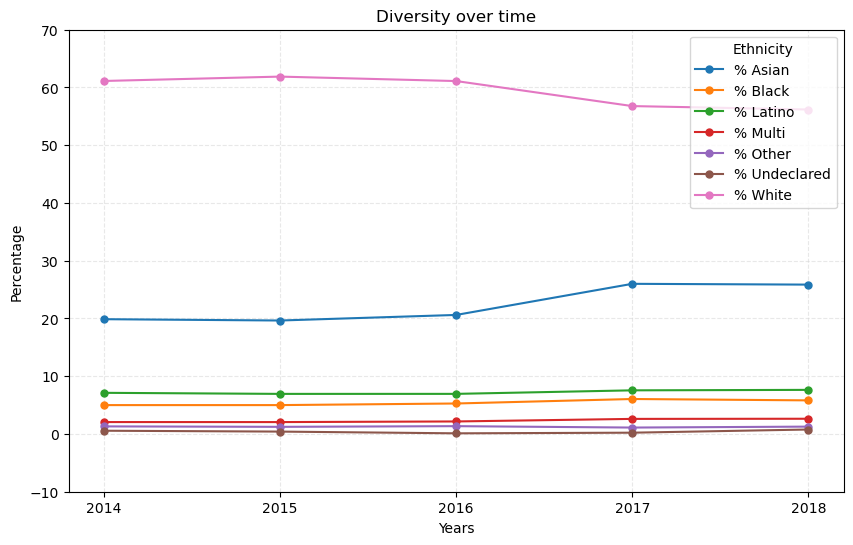

In [18]:
# Plot racial diversity over time
# 1. Get the data
pivot_df = df.pivot_table(index='Year', values=['% White', '% Asian', '% Latino', '% Black', '% Multi', '% Other', '% Undeclared'], aggfunc='mean') 

# 2. Make the canvas
# plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))

# 3. Plot the data
for column in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[column], label=column, marker='o', linestyle='-', markersize=5)

plt.title('Diversity over time')
plt.xlabel('Years')
plt.ylabel('Percentage')
plt.xticks(pivot_df.index)
plt.yticks(range(-10, 71, 10))
plt.legend(title='Ethnicity')
plt.grid(linestyle='--', alpha=0.5, color='lightgray')

# 4. Show/Save the plot
plt.show()

The r-value is: 0.12619415936237163


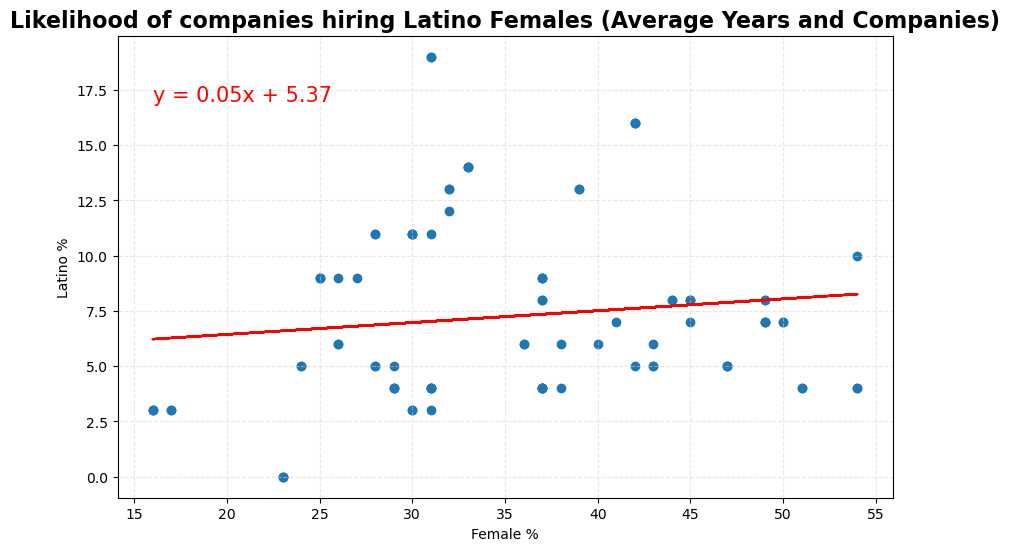

In [19]:
### Likelyhood of companies hiring hispanic women in scatter plot with regression line
# 1. Get the data
x_values = df["Female %"]
y_values = df["% Latino"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
# Calculate the regression line "y values" from the slope and intercept
regress_values = x_values * slope + intercept

# Get the equation of the line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# 2. Make the canvas
plt.figure(figsize=(10,6))

# 3. Make the scatter plot
# Create a scatter plot and plot the regression line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")

# Annotate the text for the line equation
plt.annotate(line_eq, (16,17), fontsize=15, color="red")
plt.title('Likelihood of companies hiring Latino Females (Average Years and Companies)', fontsize=16, fontweight='bold', color='black')
plt.xlabel('Female %')
plt.ylabel('Latino %')
# plt.xlim(10, 60)
# plt.ylim(-0.5, 20)
plt.grid(linestyle='--', alpha=0.5, color='lightgray')

print(f"The r-value is: {rvalue}")

# 4. Save/Show the plot
plt.show()

In [ ]:
# Define a function to create Linear Regression plots
def plot_linear_regression(gender, race, title, xlabel, ylabel, text_coordinates):
    
    # 1. Get the data
    x_values = df[f"{gender} %"]
    y_values = df[f"% {race}"]

    # Run regression on hemisphere weather data
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # 2. Make the canvas
    plt.figure(figsize=(10,6))

    # 3. Make the scatter plot
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(f'Likelyhood of companies hiring {race} {gender} (Average Years and Companies)', fontsize=16, fontweight='bold', color='black')
    plt.xlabel(f'{gender} %')
    plt.ylabel(f'% {race}')

    print(f"The r-value is: {rvalue}")

    # 4. Save/Show the plot
    plt.show()

In [ ]:
# Linear regression on Percentage of Females vs. Percentage of Latinos
# 1. Prepare the data
genders = ['Female', 'Male']
races = ['White', 'Asian', 'Latino', 'Black', 'Multi', 'Other', 'Undeclared']
coords = [[(40,40), (16,17), (16,17), (16,17), (12,40), (4,20), (10,40)],
          [(40,50), (50,0), (50,1), (50,17), (50,12), (4,70), (50,10)]]

# 2. Loop through genders 
for gender in genders:
    # Loop through races
    for race in races:
        plot_linear_regression(gender, race, 'Likelyhood of companies hiring Latino women (Average Years and Companies)', 'Female %', 'Latino %', (16,17))

In [ ]:
# Linear regression on Percentage of Females vs. Percentage of Latinos
# 1. Get the data
gender = 'Female'
race = 'Black'

plot_linear_regression(gender, race, f'Likelyhood of companies hiring {race} {gender} (Average Years and Companies)', f'{gender} %', f'{race} %', (16,17))

In [ ]:
# Define a function to create Linear Regression plots
def plot_linear_regression(gender, race, xlimits, ylimits, text_coordinates):
    
    # 1. Get the data
    x_values = df[f"{gender} %"]
    y_values = df[f"% {race}"]

    # Run regression on hemisphere weather data
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # 2. Make the canvas
    plt.figure(figsize=(10,6))

    # 3. Make the scatter plot
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation
    plt.annotate(line_eq, (text_coordinates), fontsize=15, color="red")
    plt.title(f'Likelyhood of companies hiring {race} {gender} (Average Years and Companies)', fontsize=16, fontweight='bold', color='black')
    plt.xlabel(f'{gender} %')
    plt.ylabel(f'% {race}')
    plt.xlim(xlimits)
    plt.ylim(ylimits)

    print(f"The r-value is: {rvalue}")

    # 4. Save/Show the plot
    plt.show()

In [ ]:
# Linear regression on Percentage of Females vs. Percentage of Latinos
# 1. Get the data
gender = 'Female'
race = 'White'

plot_linear_regression(gender, race, (10,60), (30,90), (40,40))

In [ ]:
# Linear regression on Percentage of Females vs. Percentage of Latinos
# 1. Get the data
gender = 'Female'
race = 'Asian'

plot_linear_regression(gender, race, (10,60), (-5,50), (12,17))

In [ ]:
# Linear regression on Percentage of Females vs. Percentage of Latinos
# 1. Get the data
gender = 'Female'
race = 'Latino'

plot_linear_regression(gender, race, (10,60), (-5,20), (16,17))

In [ ]:
# Linear regression on Percentage of Females vs. Percentage of Latinos
# 1. Get the data
gender = 'Female'
race = 'Black'

plot_linear_regression(gender, race, (10,60), (-5,20), (16,17))

In [ ]:
# Linear regression on Percentage of Females vs. Percentage of Latinos
# 1. Get the data
gender = 'Female'
race = 'Multi'

plot_linear_regression(gender, race, (10,60), (-5,20), (16,17))

In [ ]:
# Linear regression on Percentage of Females vs. Percentage of Latinos
# 1. Get the data
gender = 'Female'
race = 'Other'

plot_linear_regression(gender, race, (10,60), (-5,20), (16,17))

In [ ]:
# Linear regression on Percentage of Females vs. Percentage of Latinos
# 1. Get the data
gender = 'Female'
race = 'Undeclared'

plot_linear_regression(gender, race, (10,60), (-5,50), (12,17))

In [ ]:
genders = ['Female', 'Male']
races = ['White', 'Asian', 'Latino', 'Black', 'Multi', 'Other', 'Undeclared']
coords = [[(40,40), (16,17), (16,17), (16,17), (12,40), (4,20), (10,40)],
          [(40,50), (50,0), (50,1), (50,17), (50,12), (4,70), (50,10)]]

In [ ]:
# only get the first 10 rows
df2 = df[0:10]
df2.head(20)